Do `Kernel -> Restart & Run All` in top menu to run the notebook

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from ipywidgets import widgets

In [3]:
n_axis = np.arange(100)

In [4]:
Om = 1000
phs = np.random.uniform(0, 2*np.pi, Om)
s_det = np.cos(3/100*np.pi * n_axis[None,:] + phs[:,None])
s = s_det + np.random.normal(0,0.1,size=(Om, n_axis.size))

<IPython.core.display.Javascript object>


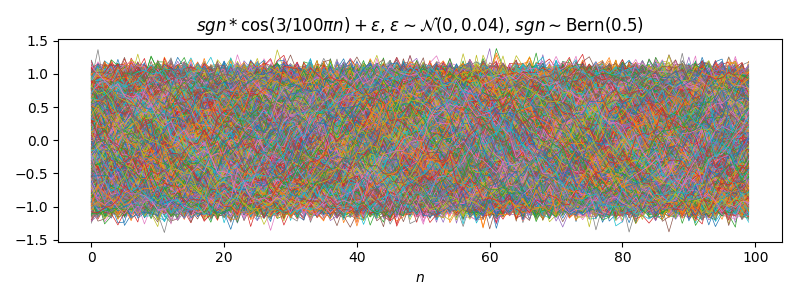

In [5]:
plt.figure(figsize=(8,3))
plt.plot(s.T, linewidth=0.5)
plt.gca().set_title('$sgn * \cos(3/100 \pi n) + \epsilon$, $\epsilon \sim \mathcal{N}(0, 0.04)$, $sgn \sim \mathrm{Bern}(0.5)$')
plt.gca().set_xlabel('$n$')

plt.tight_layout()

In [6]:


pdf_all = []
bin_centers1_all = []
bin_centers2_all = []

for n1 in n_axis:
    pdf_n1_all = []
    bin_centers1_n1_all = []
    bin_centers2_n1_all = []
    for n2 in n_axis:
        pdf, x1_edges, x2_edges = np.histogram2d(s[:,n1], s[:,n2], bins=(50,50), normed=True, range=[[-1.5,1.5],[-1.5,1.5]])
        bin_centers1 = x1_edges[:-1] + (x1_edges[1:] - x1_edges[:-1]) / 2
        bin_centers2 = x2_edges[:-1] + (x2_edges[1:] - x2_edges[:-1]) / 2
        pdf_n1_all.append(pdf)
        bin_centers1_n1_all.append(bin_centers1)
        bin_centers2_n1_all.append(bin_centers2)
    pdf_all.append(pdf_n1_all)
    bin_centers1_all.append(bin_centers1_n1_all)
    bin_centers2_all.append(bin_centers2_n1_all)
        

<IPython.core.display.Javascript object>


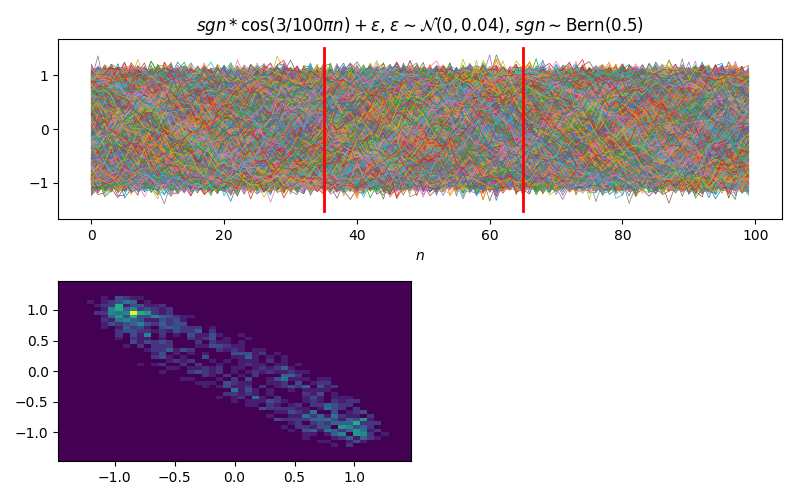

Widget Javascript not detected.  It may not be installed or enabled properly.


<function __main__.plot_time>

In [7]:
f = plt.figure(figsize=(8,5))

ax0 = f.add_subplot(2,1,1)
plt0 = ax0.plot(n_axis, s.T, linewidth=0.5)
ax0.set_title('$sgn * \cos(3/100 \pi n) + \epsilon$, $\epsilon \sim \mathcal{N}(0, 0.04)$, $sgn \sim \mathrm{Bern}(0.5)$')
ax0.set_xlabel('$n$')

ymin,ymax = ax0.get_ylim()
y = np.linspace(ymin,ymax,100)
plt_redline1, = ax0.plot(np.ones(y.size)*20, y, color='r', linewidth=2)
plt_redline2, = ax0.plot(np.ones(y.size)*20, y, color='r', linewidth=2)

ax1 = f.add_subplot(2,2,3)
n1 = 35
n2 = 65
X,Y = np.meshgrid(bin_centers1_all[n1][n2], bin_centers2_all[n1][n2])
plt_pdf = ax1.pcolormesh(X,Y,pdf_all[n1][n2])

plt.tight_layout()

def plot_time(n1=35,n2=65):
    #plt1.set_data(bin_centers_all[n],pdf_all[n])
    #plt2.set_data(bin_centers_all[n],fx_all[n])
    #plt_scatter1.set_offsets(list(zip(s[:,n],np.zeros(Om))))
    #plt_scatter2.set_offsets(list(zip(s[:,n],np.zeros(Om))))
    plt_redline1.set_data(np.ones(y.size)*n1, y)
    plt_redline2.set_data(np.ones(y.size)*n2, y)
    plt_pdf.set_array(pdf_all[n1][n2][:-1,:-1].T.ravel())
    #ax1.set_title(f'$p(x,{n})$')
    #ax2.set_title(f'$F(x,{n})$')
    plt.draw()

widgets.interact(plot_time, 
                 n1 = (0,99,1),
                 n2 = (0,99,1))